In this tutorial we'll expose and plot the mesh that PHOEBE uses to compute the model and learn how to create plots/animations of the mesh quantities.

# Setup

Uncomment the line below if necessary to see inline plots

In [1]:
#%matplotlib inline

In [2]:
import phoebe
from phoebe import u,c

import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
logger = phoebe.logger(clevel='WARNING')

In [4]:
b = phoebe.default_binary()

# Meshes

**NOTE:** customizing the returned columns in a mesh is planned for an upcoming release and may require some changes to syntax in the near future.

We already covered adding a mesh dataset, but now let's look at what gets returned by the model and how to plot meshes.

In [5]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [6]:
b.add_dataset('mesh', times=[0, 0.25, 0.5, 0.75], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [7]:
b.run_compute()

<ParameterSet: 308 parameters | kinds: mesh, lc>

Let's look at the Parameters in the model that have been tagged with our mesh dataset.

In [8]:
b.filter(context='model', dataset='mesh01').qualifiers

['loggs',
 'pot',
 'xs',
 'zs',
 'horizon_zs',
 'mus',
 'rs',
 'nys',
 'r_projs',
 'horizon_xs',
 'teffs',
 'vzs',
 'vxs',
 'horizon_analytic_xs',
 'volume',
 'rpole',
 'horizon_analytic_ys',
 'ys',
 'areas',
 'nzs',
 'vys',
 'cosbetas',
 'nxs',
 'horizon_analytic_zs',
 'tareas',
 'vertices',
 'horizon_ys',
 'times',
 'visibilities',
 'normals',
 'visible_centroids']

There are a lot of Parameters.  Most of these are really only needed for debugging, but a few are helpful to use for coloring plots.  Let's look at the default mesh plot.  Since we have meshes stored at several times, we should provide a single time at which we want the meshes drawn.  Let's choose quarter-phase so that we can see both stars.

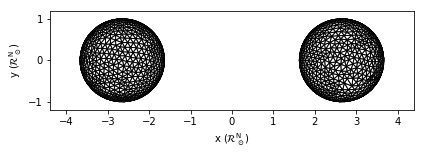

In [9]:
axs, artists = b.filter(dataset='mesh01').plot(time=0.25)

Now if we want to, we can choose separate columns for facecolor and edgecolor (or pass None to turn off edges).

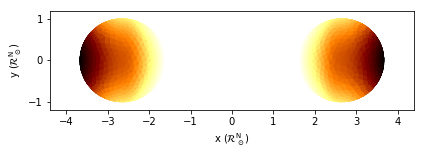

In [10]:
axs, artists = b.filter(dataset='mesh01').plot(time=0.25, facecolor='teffs', edgecolor=None)

If we wanted, we can even override the default "mesh" plot and plot any two columns against each other in a scatter plot.

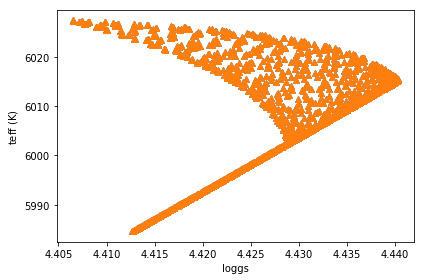

In [11]:
axs, artists = b.filter(dataset='mesh01').plot(time=0.25, x='loggs', y='teffs')

All the Parameters tagged in the model with dataset='mesh01' are passband-*independent*.  Passband-*dependent* Parameters are exposed as well, but they are tagged with the lc/rv dataset instead (but still with kind='mesh' instead of kind='lc' or 'rv').  To see all of these, let's filter on kind='mesh' instead of dataset='mesh01'.  These will only be available for times that occur in **both** the lc and mesh datasets.

In [12]:
b.filter(context='model', kind='mesh').datasets

['mesh01', 'lc01']

In [13]:
b.filter(context='model', kind='mesh', dataset='lc01').qualifiers

['normal_intensities',
 'abs_intensities',
 'abs_normal_intensities',
 'intensities',
 'ldint',
 'pblum',
 'boost_factors',
 'ptfarea']

Here we see the Parameters for our light curve.  These are the local quantities needed to obtain the final integrated flux at this single time.  We can use these as facecolor/edgecolor as well, but need to change our filter a bit so that they're included.

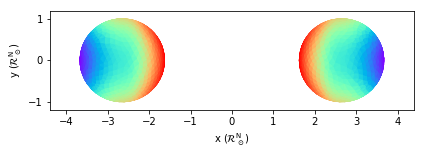

In [14]:
axs, artists = b.filter(kind='mesh').plot(time=0.25, facecolor='abs_normal_intensities', edgecolor=None)

# Exercise

Make a mesh plot (at any single time) to show the limb-darkening across the surface of the star.  Play with changing the underlying limb-darkening model and re-plotting.

Try making an animation with the meshes.